In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# сохраним исходную таблицу в переменную data

data = pd.read_csv('/content/gdrive/MyDrive/Работа/ttisi/disc4.csv')

In [4]:
# выведем первые 10 строк

data.head(10)

,Версия_вопр,Качество,Index,rus original,Сегмент,Направленность,Значение,Индикатор,"1,00","2,00","3,00","4,00","5,00",Респондент,№ респондента,Должность,Организация,Ответ забракован
0,1.0,I,WB/INSTRUMENT/FRAME1/QUESTION,"""Изменений в приоритетах""",behaviors,NaN,2.0,Приоритеты при выполнении задач меняются,NaN,"2,00",NaN,NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
1,1.0,C,WB/INSTRUMENT/FRAME2/QUESTION,"""Необходимости контролировать высокое качество""",behaviors,NaN,3.0,"Необходимо контролировать высокое качество, не...",NaN,NaN,"3,00",NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
2,1.0,D,WB/INSTRUMENT/FRAME3/QUESTION,"""Инициирования новых задач""",behaviors,NaN,2.0,Необходимо инициировать и ставить новые цели,NaN,"2,00",NaN,NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
3,1.0,I,WB/INSTRUMENT/FRAME4/QUESTION,"""Необходимости в налаживании контактов""",behaviors,NaN,4.0,Необходимо создавать сеть контактов,NaN,NaN,NaN,"4,00",NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
4,1.0,S,WB/INSTRUMENT/FRAME5/QUESTION,"""Необходимости сосредотачиваться каждый раз на...",behaviors,NaN,1.0,Приходится сосредотачиваться на выполнении тол...,"1,00",NaN,NaN,NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
5,1.0,C,WB/INSTRUMENT/FRAME6/QUESTION,"""Необходимости организовывать всё в деталях""",behaviors,NaN,2.0,Необходимо организовывать всё до мельчайших де...,NaN,"2,00",NaN,NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
6,1.0,D,WB/INSTRUMENT/FRAME7/QUESTION,"""Необходимости оперативно реагировать""",behaviors,NaN,4.0,Необходимо ощущение срочности,NaN,NaN,NaN,"4,00",NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
7,1.0,S,WB/INSTRUMENT/FRAME8/QUESTION,"""Постоянно повторяющихся задач""",behaviors,NaN,3.0,Задачи постоянно повторяются,NaN,NaN,"3,00",NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
8,1.0,I,WB/INSTRUMENT/FRAME9/QUESTION,"""Необходимости привносить энтузиазм""",behaviors,NaN,3.0,Необходимо проявлять и поощрять энтузиазм,NaN,NaN,"3,00",NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
9,1.0,D,WB/INSTRUMENT/FRAME10/QUESTION,"""Сложных, с вызовом, задач""",behaviors,NaN,3.0,Задачи требуют каждый раз справляться с вызовом,NaN,NaN,"3,00",NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN


In [5]:
# общая информация о данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10180 entries, 0 to 10179
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Версия_вопр       9368 non-null   float64
 1   Качество          10126 non-null  object 
 2   Index             9567 non-null   object 
 3   rus original      9395 non-null   object 
 4   Сегмент           10126 non-null  object 
 5   Направленность    2019 non-null   float64
 6   Значение          10122 non-null  float64
 7   Индикатор         10098 non-null  object 
 8   1,00              570 non-null    object 
 9   2,00              2113 non-null   object 
 10  3,00              2968 non-null   object 
 11  4,00              2518 non-null   object 
 12  5,00              1929 non-null   object 
 13  Респондент        10180 non-null  object 
 14  № респондента     10180 non-null  object 
 15  Должность         10180 non-null  object 
 16  Организация       10180 non-null  object

In [6]:
# удалим отвлекающие колонки

data.drop(['Index', 'rus original', 'Направленность'], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10180 entries, 0 to 10179
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Версия_вопр       9368 non-null   float64
 1   Качество          10126 non-null  object 
 2   Сегмент           10126 non-null  object 
 3   Значение          10122 non-null  float64
 4   Индикатор         10098 non-null  object 
 5   1,00              570 non-null    object 
 6   2,00              2113 non-null   object 
 7   3,00              2968 non-null   object 
 8   4,00              2518 non-null   object 
 9   5,00              1929 non-null   object 
 10  Респондент        10180 non-null  object 
 11  № респондента     10180 non-null  object 
 12  Должность         10180 non-null  object 
 13  Организация       10180 non-null  object 
 14  Ответ забракован  352 non-null    object 
dtypes: float64(2), object(13)
memory usage: 1.2+ MB


In [8]:
# первые 30 строк

data.head(30)

,Версия_вопр,Качество,Сегмент,Значение,Индикатор,"1,00","2,00","3,00","4,00","5,00",Респондент,№ респондента,Должность,Организация,Ответ забракован
0,1.0,I,behaviors,2.0,Приоритеты при выполнении задач меняются,NaN,"2,00",NaN,NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
1,1.0,C,behaviors,3.0,"Необходимо контролировать высокое качество, не...",NaN,NaN,"3,00",NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
2,1.0,D,behaviors,2.0,Необходимо инициировать и ставить новые цели,NaN,"2,00",NaN,NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
3,1.0,I,behaviors,4.0,Необходимо создавать сеть контактов,NaN,NaN,NaN,"4,00",NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
4,1.0,S,behaviors,1.0,Приходится сосредотачиваться на выполнении тол...,"1,00",NaN,NaN,NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
5,1.0,C,behaviors,2.0,Необходимо организовывать всё до мельчайших де...,NaN,"2,00",NaN,NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
6,1.0,D,behaviors,4.0,Необходимо ощущение срочности,NaN,NaN,NaN,"4,00",NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
7,1.0,S,behaviors,3.0,Задачи постоянно повторяются,NaN,NaN,"3,00",NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
8,1.0,I,behaviors,3.0,Необходимо проявлять и поощрять энтузиазм,NaN,NaN,"3,00",NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN
9,1.0,D,behaviors,3.0,Задачи требуют каждый раз справляться с вызовом,NaN,NaN,"3,00",NaN,NaN,Денис,1,2-Руководитель группы отдела закупок,Протек,NaN


In [9]:
# уникальные занчения колонки "Значения"

data['Значение'].unique()

array([ 2.,  3.,  4.,  1.,  5.,  0., nan, -2., -4., -3., -5., -1.])

In [10]:
# удалим строки с пропусками в колонке "Значения" и нулевые значения

data = data.query('Значение.notna() and Значение != 0')

In [11]:
# приведем колонку "Значения" к целочисленному формату

data['Значение'] = data['Значение'].astype('Int64')

In [12]:
# сгруппируем данные по организации, должности, сегменту, качеству и посчитаем среднее значение "Значения"

data_grouped = data.groupby(['Организация', 'Должность', 'Сегмент', 'Качество']).agg({'Значение':['mean']}).reset_index()

In [13]:
# привведем в порядок названия колонок

data_grouped.columns = ['Организация', 'Должность', 'Сегмент', 'Качество', 'Среднее значение']

In [21]:
data_grouped = data_grouped.query('Сегмент != "Dimbal"')

In [22]:
# первые 30 строк

data_grouped.head(30)

,Организация,Должность,Сегмент,Качество,Среднее значение,Итоговое значение
2,Куйбышев Азот,А1-Начальник отдела продаж,behaviors,C,3.1875,58
3,Куйбышев Азот,А1-Начальник отдела продаж,behaviors,D,3.007634,51
4,Куйбышев Азот,А1-Начальник отдела продаж,behaviors,I,3.02381,52
5,Куйбышев Азот,А1-Начальник отдела продаж,behaviors,S,3.202381,59
6,Куйбышев Азот,А1-Начальник отдела продаж,df,ALTRUISTIC,2.166667,21
7,Куйбышев Азот,А1-Начальник отдела продаж,df,COLLABORATIVE,2.5,31
8,Куйбышев Азот,А1-Начальник отдела продаж,df,COMMANDING,2.958333,49
9,Куйбышев Азот,А1-Начальник отдела продаж,df,HARMONIOUS,3.125,56
10,Куйбышев Азот,А1-Начальник отдела продаж,df,INTELLECUTAL,3.166667,58
11,Куйбышев Азот,А1-Начальник отдела продаж,df,INTENTIONAL,3.083333,54


In [23]:
# использую коэффициент из исходной эксель-таблицы для расчета итоговых значений качеств

data_grouped['Итоговое значение'] = (100/(1+data_grouped['Среднее значение'].apply(lambda x: math.exp(4.914-1.648*x)))).round().astype('Int64')

In [24]:
# Итоговые значения требований к качествам по каждой ограницации
# первые 50 строк

data_grouped.drop('Среднее значение', axis=1).head(50)

,Организация,Должность,Сегмент,Качество,Итоговое значение
2,Куйбышев Азот,А1-Начальник отдела продаж,behaviors,C,58
3,Куйбышев Азот,А1-Начальник отдела продаж,behaviors,D,51
4,Куйбышев Азот,А1-Начальник отдела продаж,behaviors,I,52
5,Куйбышев Азот,А1-Начальник отдела продаж,behaviors,S,59
6,Куйбышев Азот,А1-Начальник отдела продаж,df,ALTRUISTIC,21
7,Куйбышев Азот,А1-Начальник отдела продаж,df,COLLABORATIVE,31
8,Куйбышев Азот,А1-Начальник отдела продаж,df,COMMANDING,49
9,Куйбышев Азот,А1-Начальник отдела продаж,df,HARMONIOUS,56
10,Куйбышев Азот,А1-Начальник отдела продаж,df,INTELLECUTAL,58
11,Куйбышев Азот,А1-Начальник отдела продаж,df,INTENTIONAL,54


In [25]:
# Итоговые средние требования к качествам по всем огранизациям
# первые 50 строк

data_final = data_grouped.groupby(['Должность', 'Сегмент', 'Качество']).agg({'Итоговое значение':'mean'}).reset_index()
data_final['Итоговое значение'] = data_final['Итоговое значение'].astype('Int64')
data_final.head(50)

,Должность,Сегмент,Качество,Итоговое значение
0,1-Руководитель отдела закупок,behaviors,C,44
1,1-Руководитель отдела закупок,behaviors,D,70
2,1-Руководитель отдела закупок,behaviors,I,80
3,1-Руководитель отдела закупок,behaviors,S,55
4,1-Руководитель отдела закупок,df,ALTRUISTIC,41
5,1-Руководитель отдела закупок,df,COLLABORATIVE,70
6,1-Руководитель отдела закупок,df,COMMANDING,84
7,1-Руководитель отдела закупок,df,HARMONIOUS,70
8,1-Руководитель отдела закупок,df,INTELLECUTAL,84
9,1-Руководитель отдела закупок,df,INTENTIONAL,57


In [ ]:
# сохраняю в отдельный эксель-файл

data_final.to_excel('/content/gdrive/MyDrive/Работа/ttisi/data_final.xlsx')

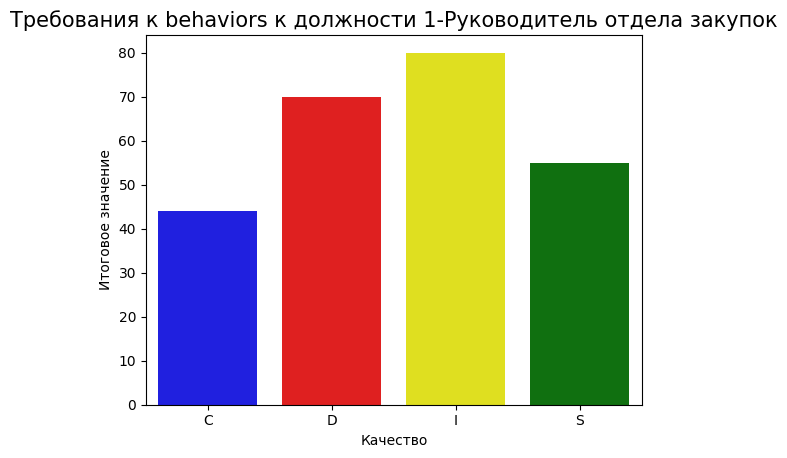

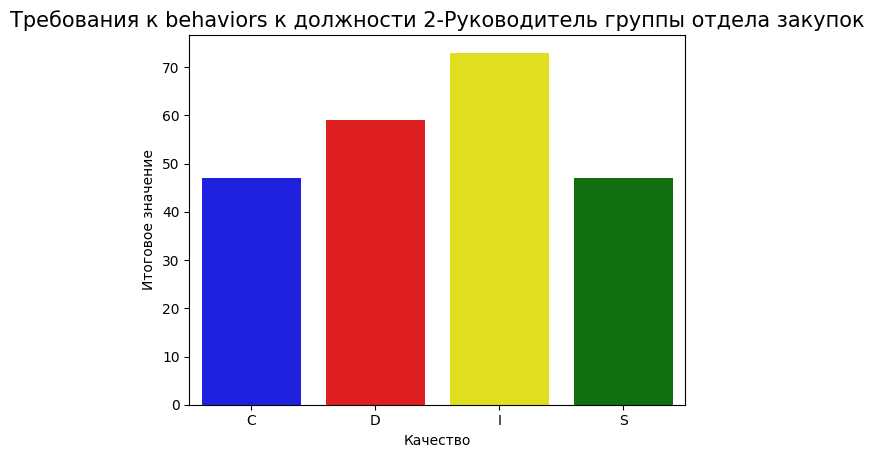

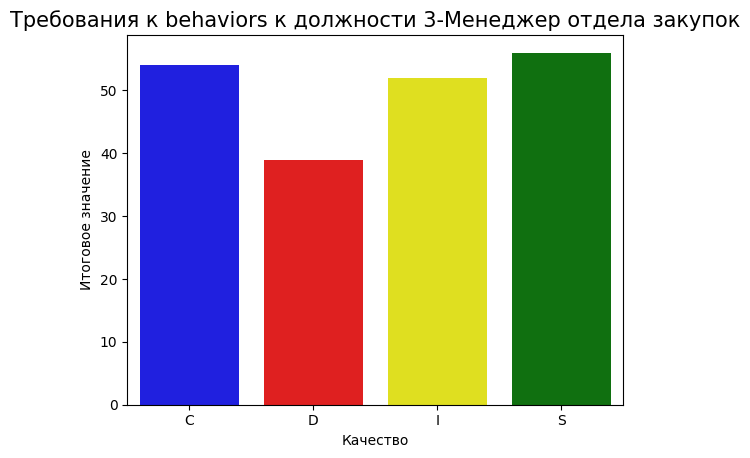

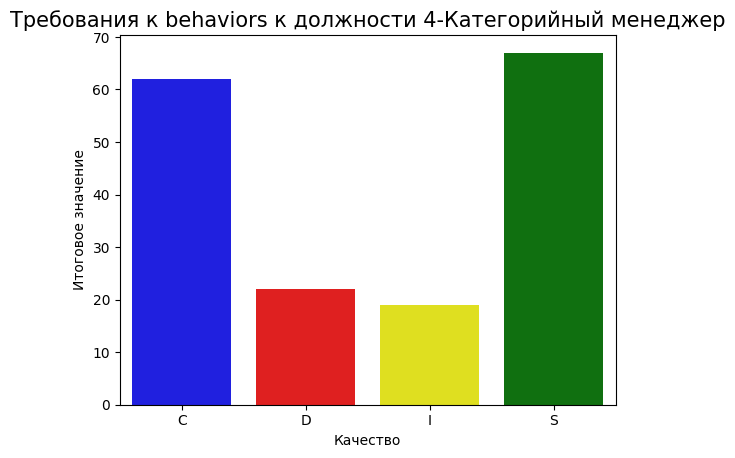

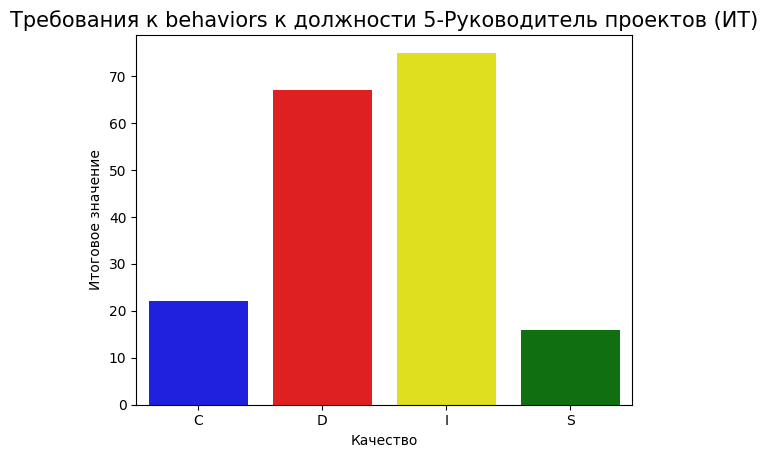

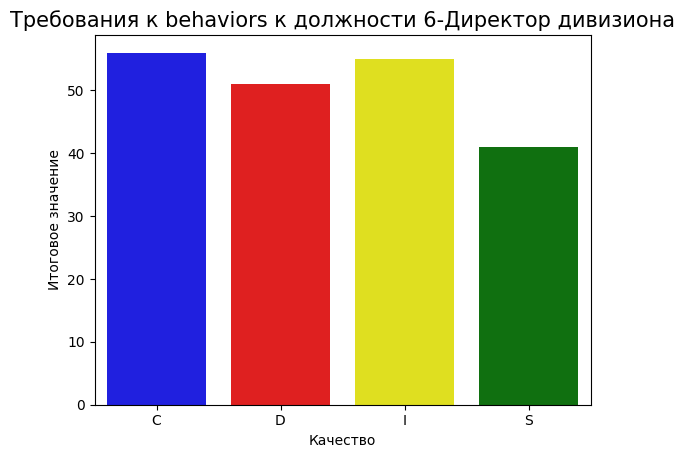

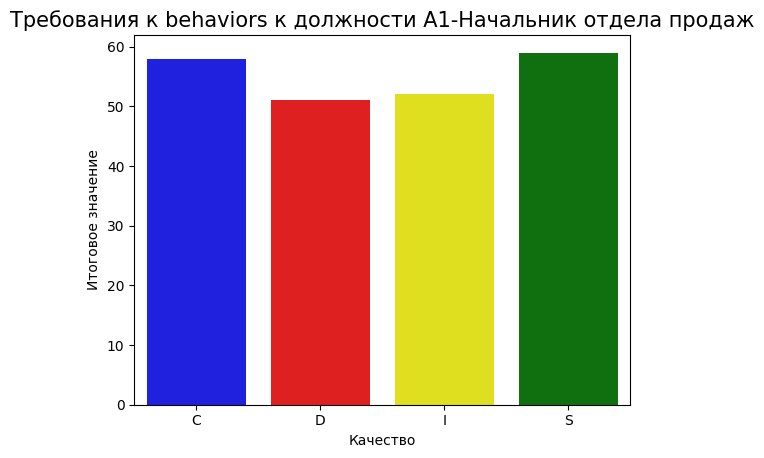

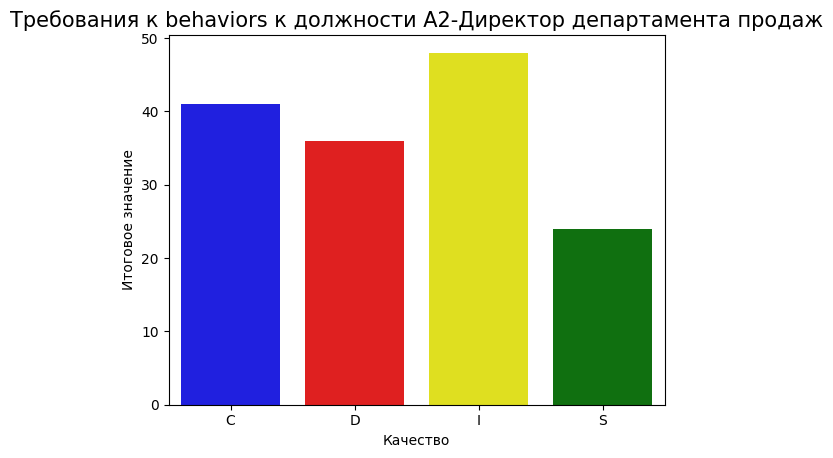

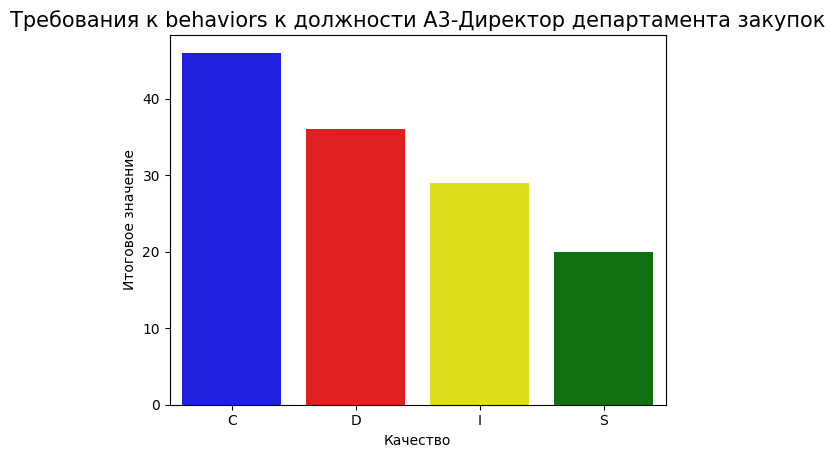

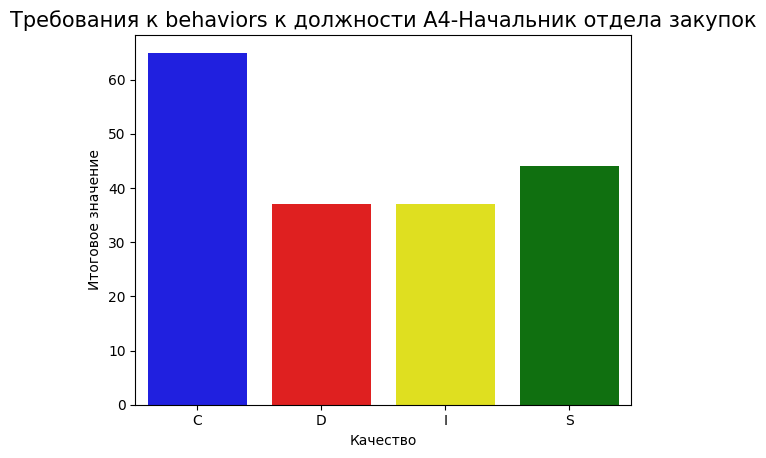

In [18]:
# выведем диаграммы требований к behaviors ко всем должностям

for d in data_final['Должность'].unique():
    sns.barplot(data=data_final.query('Должность==@d and Сегмент=="behaviors"'), x='Качество', y='Итоговое значение', palette=["blue", "red", "yellow", "green"])
    plt.title(f'Требования к behaviors к должности {d}', fontsize=15)
    plt.show();

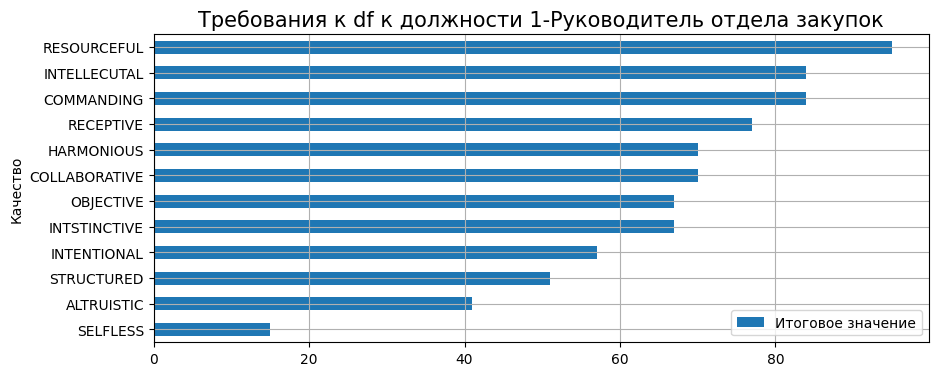

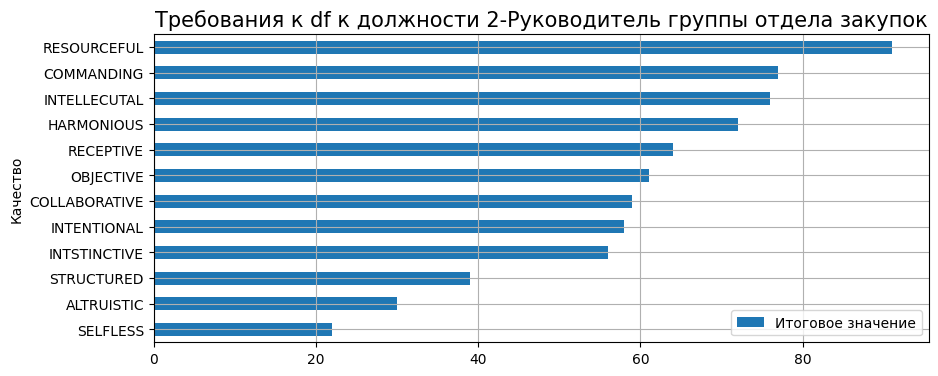

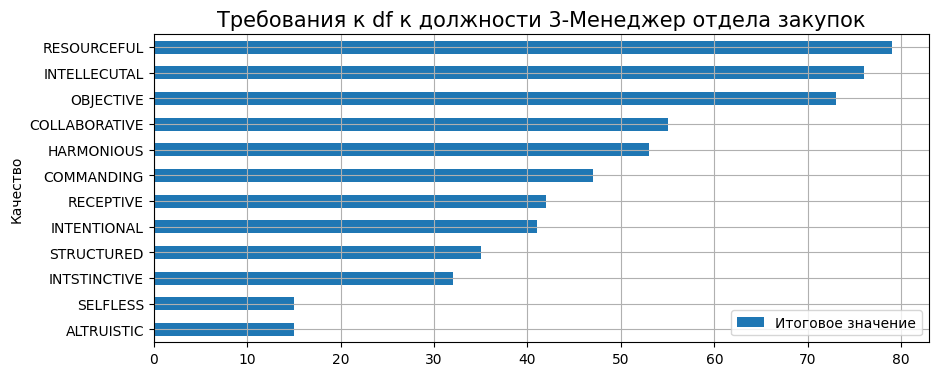

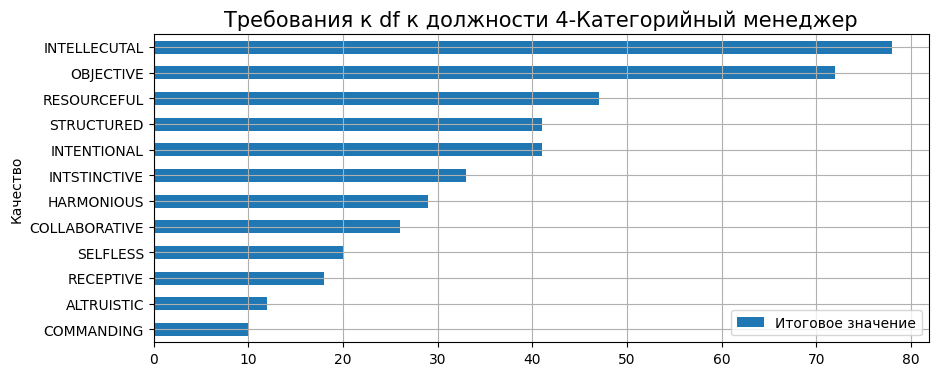

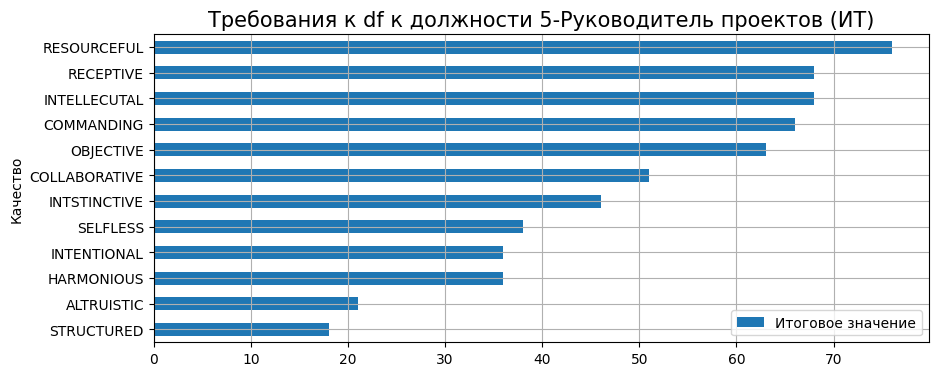

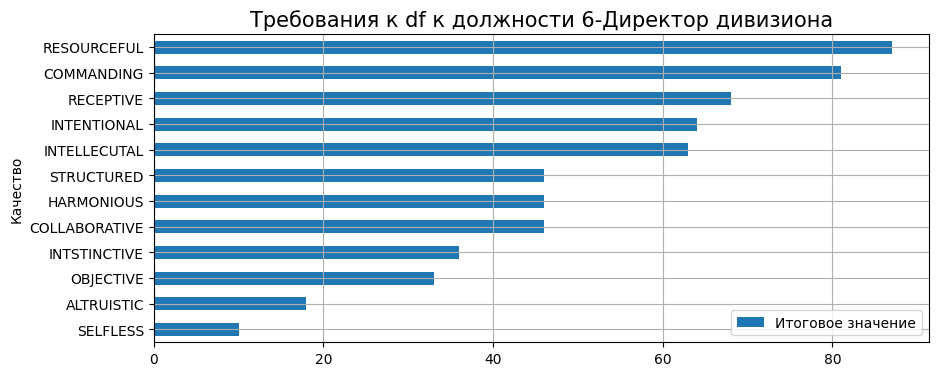

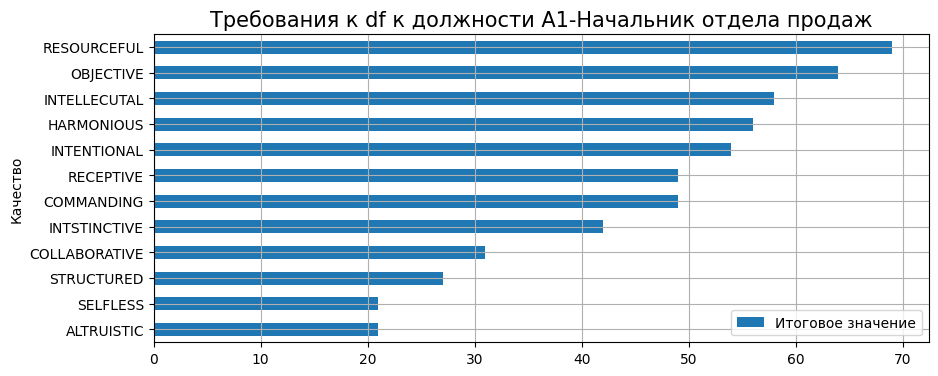

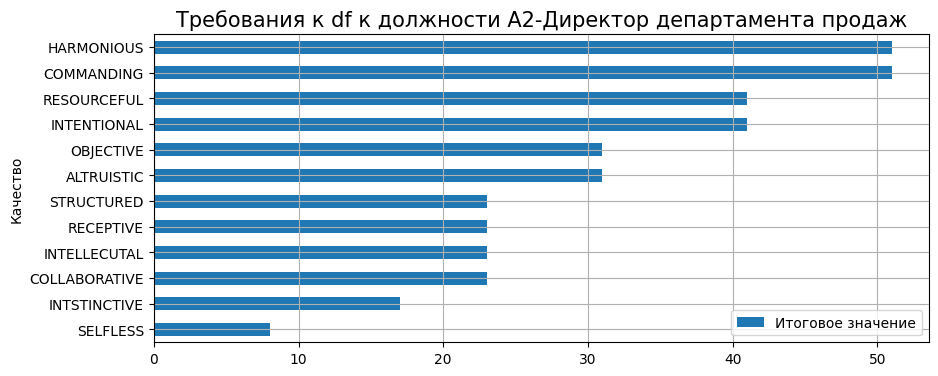

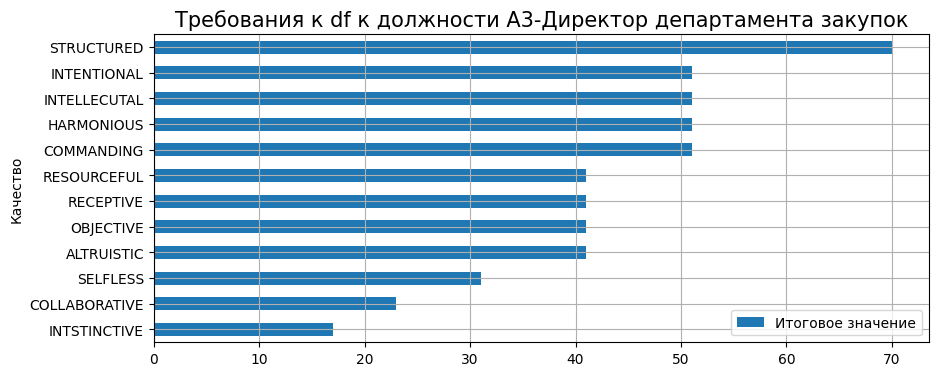

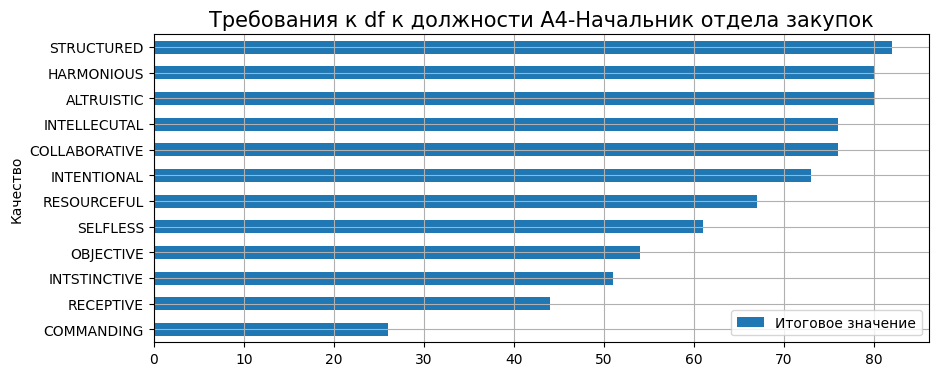

In [19]:
# выведем диаграммы требований к df ко всем должностям

for d in data_final['Должность'].unique():
  data_final.query('Должность==@d and Сегмент=="df"').sort_values('Итоговое значение')\
  .plot(kind='barh', x='Качество', figsize=(10, 4), grid=True)
  plt.title(f'Требования к df к должности {d}', fontsize=15);

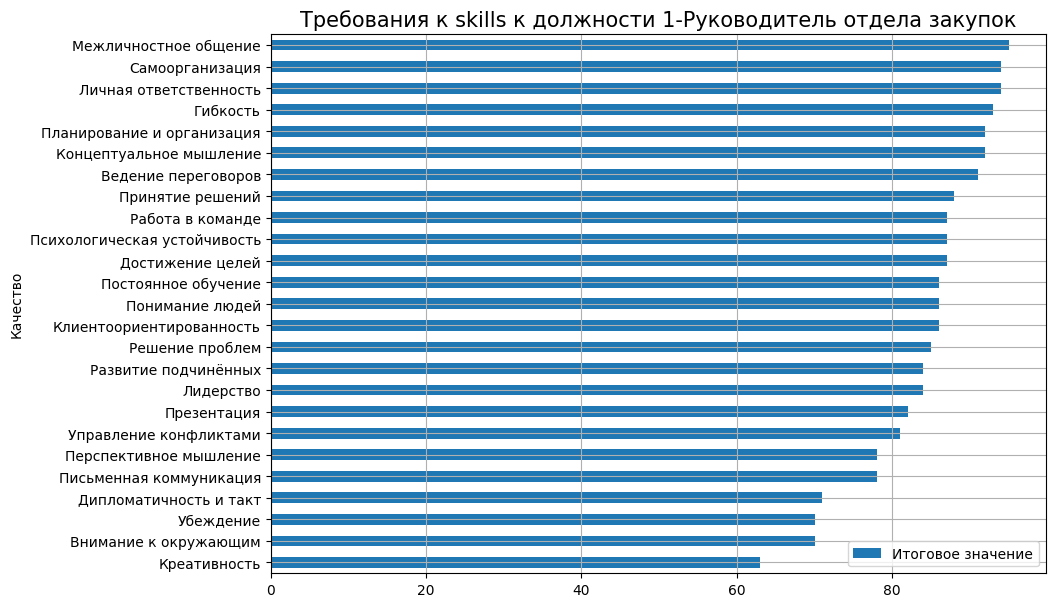

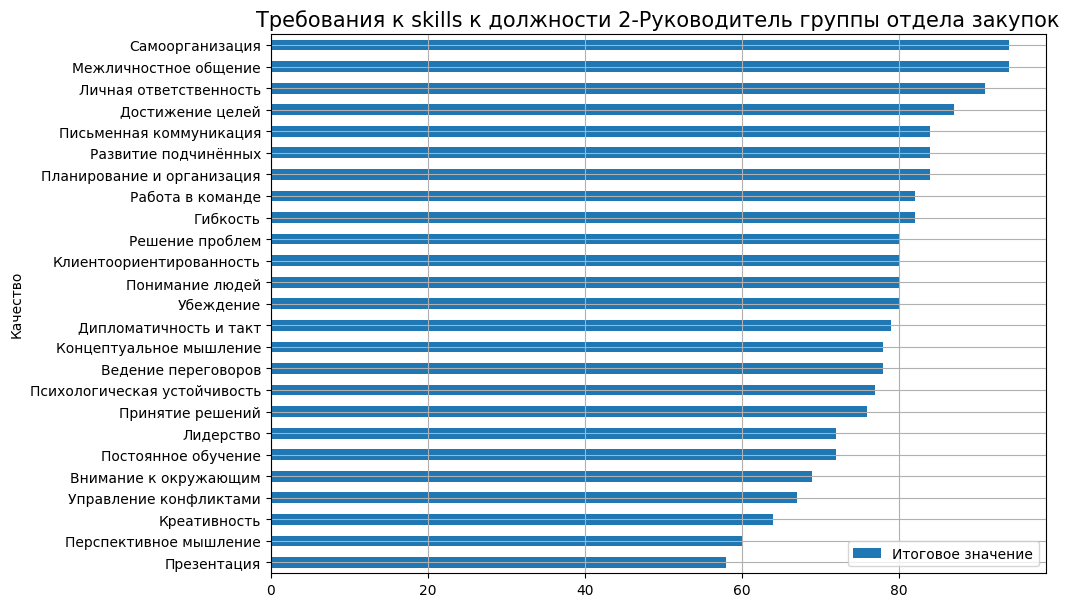

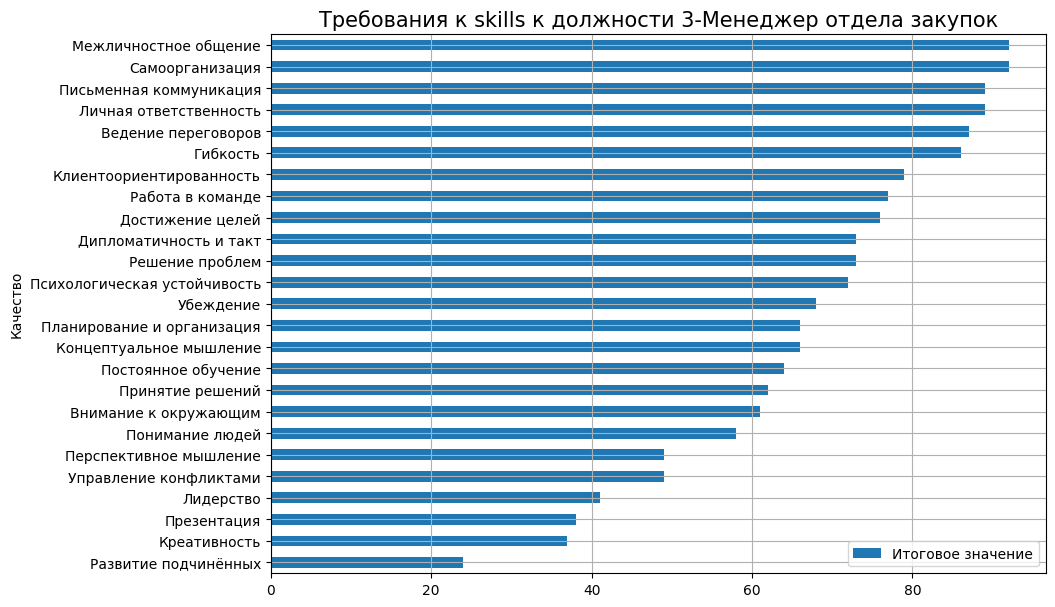

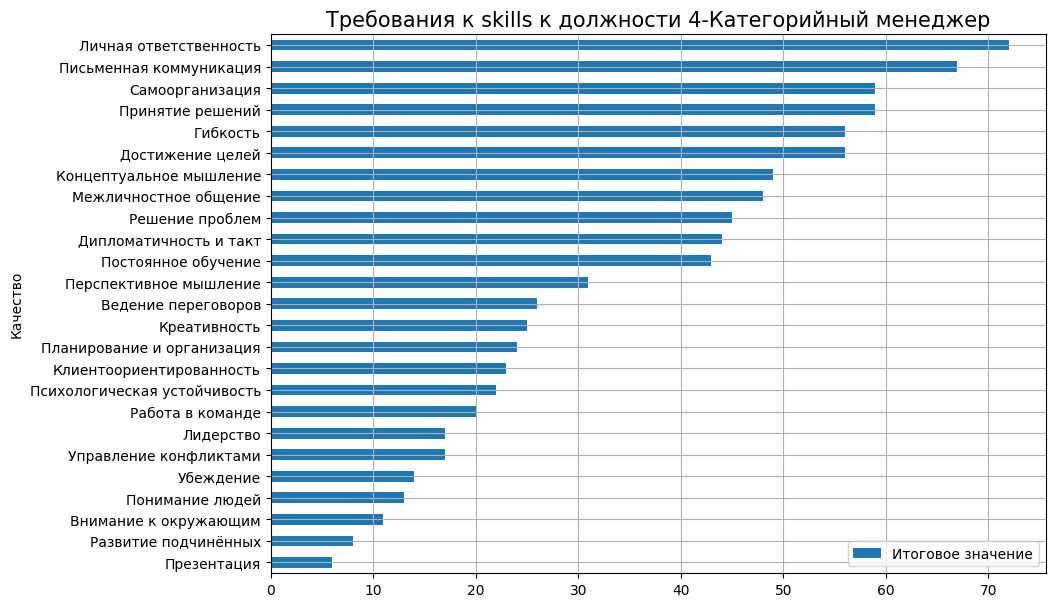

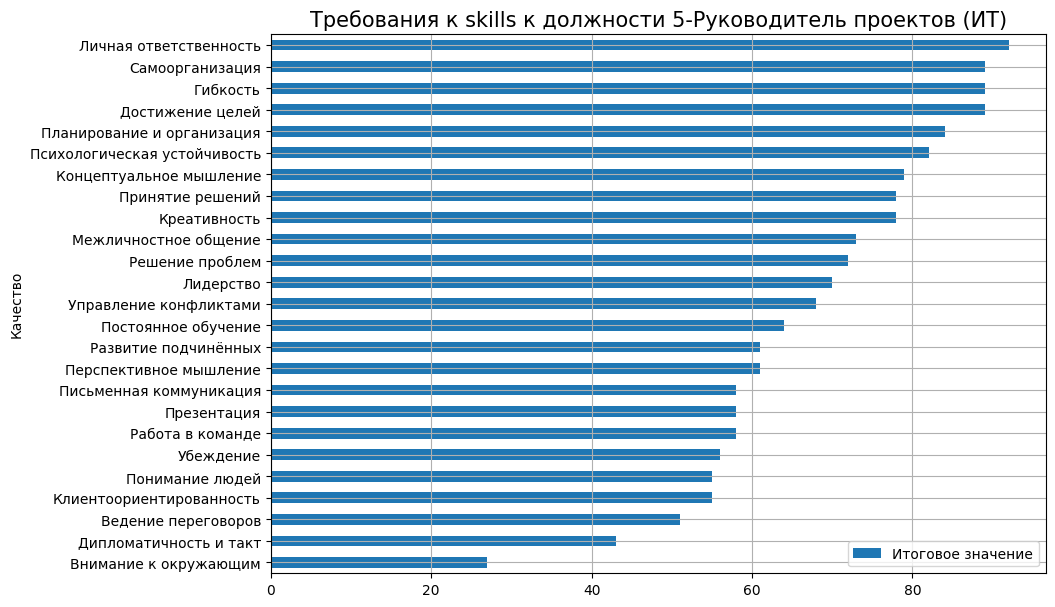

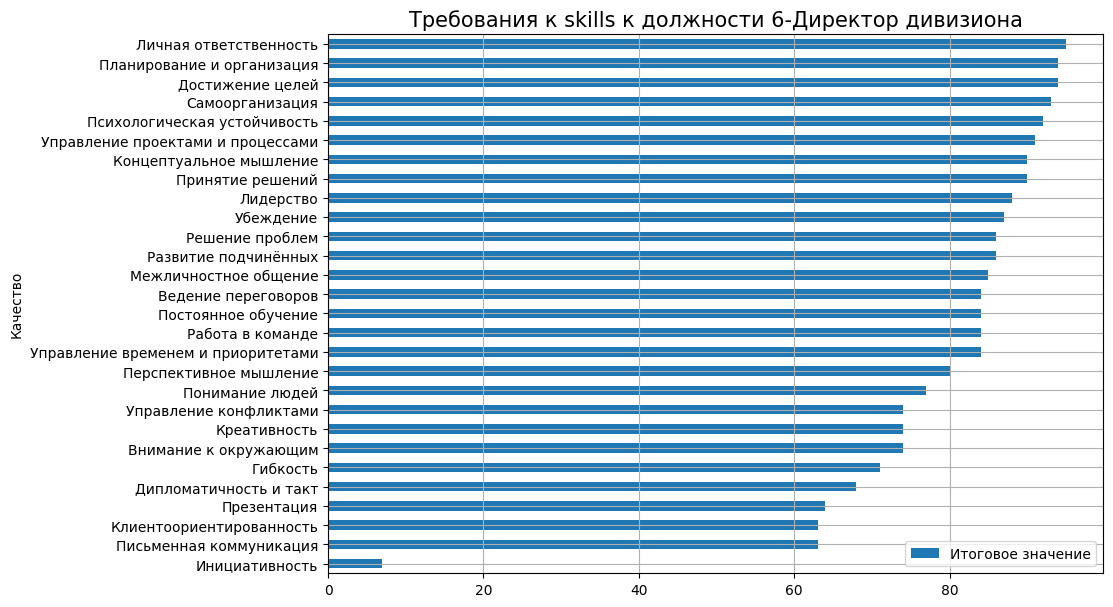

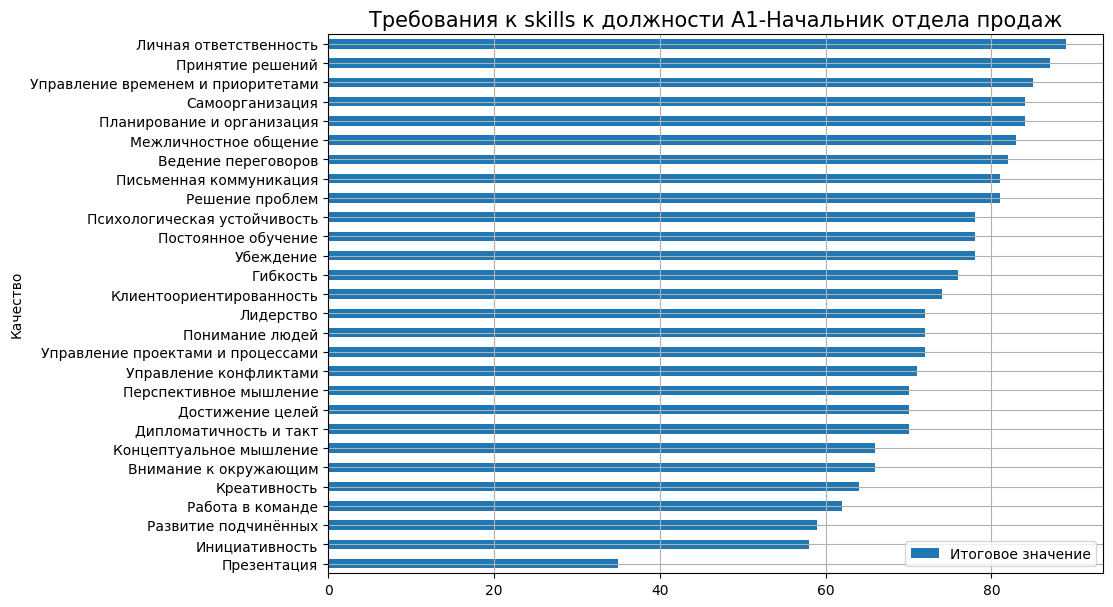

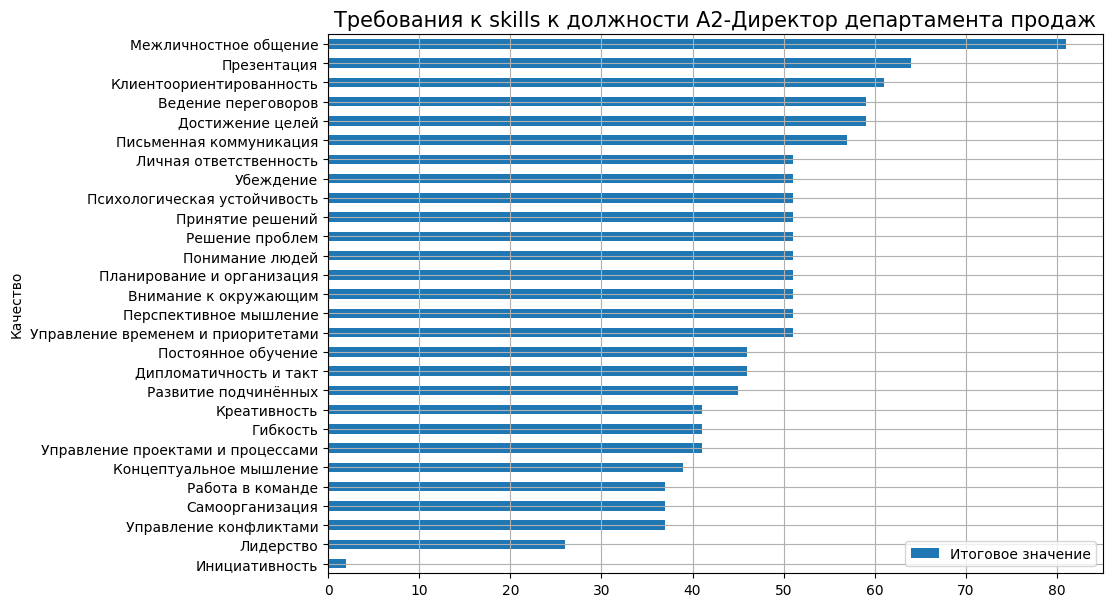

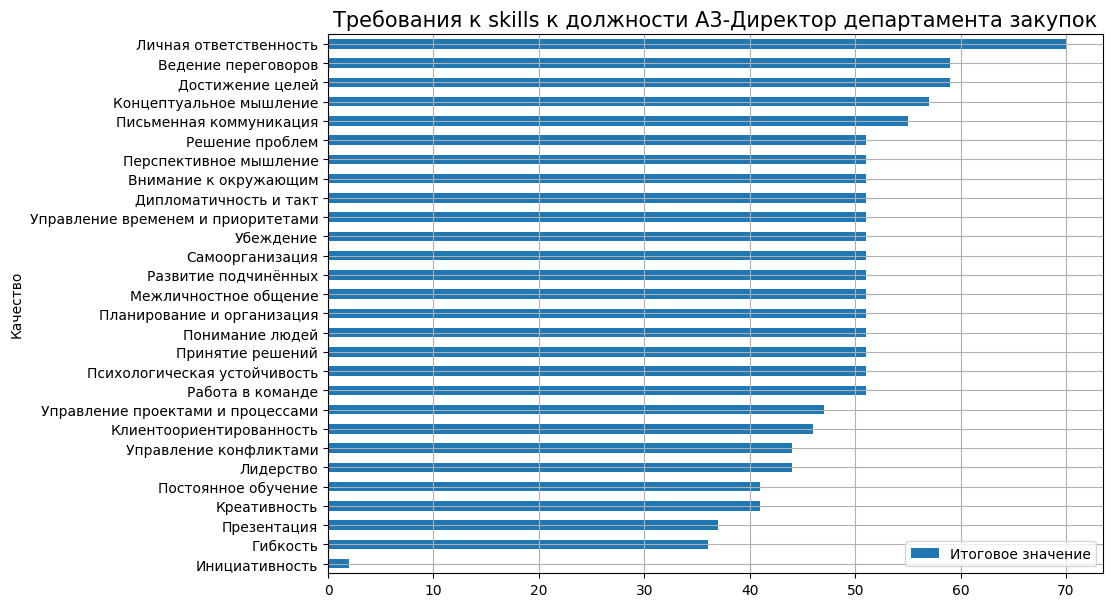

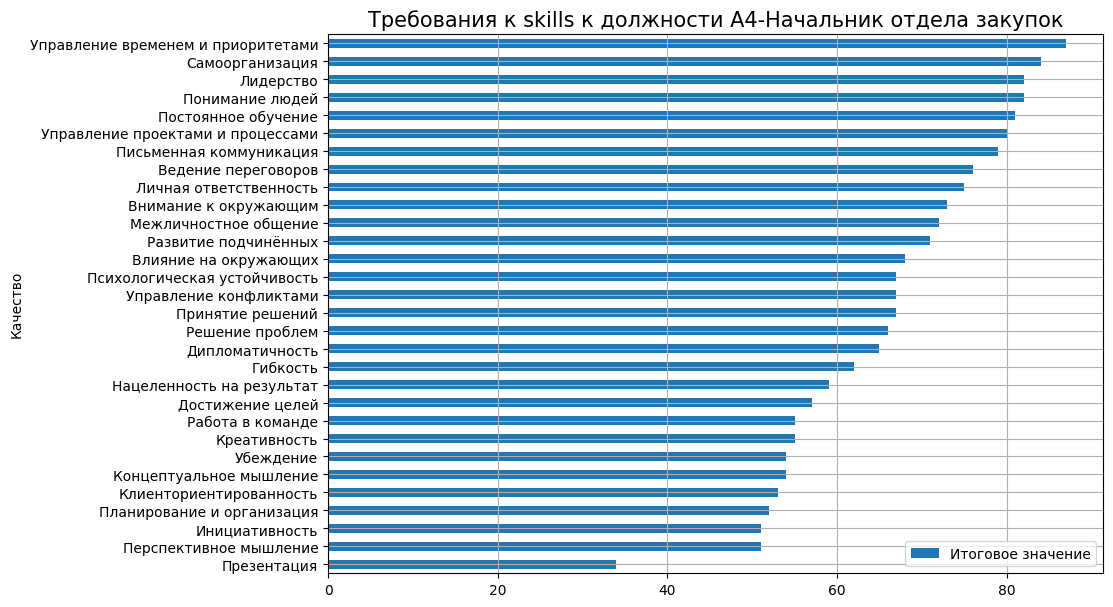

In [20]:
# выведем диаграммы требований к skills ко всем должностям

for d in data_final['Должность'].unique():
  data_final.query('Должность==@d and Сегмент=="skills"').sort_values('Итоговое значение')\
  .plot(kind='barh', x='Качество', figsize=(10, 7), grid=True)
  plt.title(f'Требования к skills к должности {d}', fontsize=15);